In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# %matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the HR data 

Edata = pd.read_csv(r"C:\\Users\\Dell\\Downloads\\electricity.csv", header=1)
#hrdata = pd.read_csv(r"D:\00 Datasets\00-Data\HR_comma_sep.csv", header=0)

# Copy to back-up file

Edata_bk = Edata.copy()

# Display first 5 records

Edata.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [3]:
# Display the dataset information

Edata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


In [4]:
#Checking for NULL values

Edata.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [5]:
# Displaying Duplicate values with in dataset

Edata[Edata.duplicated(keep='last')]

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class


In [6]:
# Displaying target variable
pd.DataFrame(Edata['class'])

,class
0,UP
1,UP
2,UP
3,UP
4,DOWN
...,...
45307,DOWN
45308,DOWN
45309,DOWN
45310,UP


In [7]:
# Use LabelBinarizer for target variables

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

Edata['class'] = LB.fit_transform(Edata['class'])

In [8]:
# Displaying target variable after labelling

pd.DataFrame(Edata['class'])

,class
0,1
1,1
2,1
3,1
4,0
...,...
45307,0
45308,0
45309,0
45310,1


In [9]:
# Display dataset columns

Edata.columns


Index(['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice',
       'vicdemand', 'transfer', 'class'],
      dtype='object')

In [10]:
# Displaying number of columns and rows

Edata.shape

(45312, 9)

# Eliminating outliers using 3-sigma method

In [11]:
date_ul=Edata.date.mean()+3*Edata.date.std()
date_ll=Edata.date.mean()-3*Edata.date.std()
Edata1=Edata[(Edata.date<date_ul) & (Edata.date>date_ll)]
Edata1.shape

(45312, 9)

In [12]:
day_ul=Edata.day.mean()+3*Edata.day.std()
day_ll=Edata.day.mean()-3*Edata.day.std()
Edata1=Edata[(Edata.day<day_ul) & (Edata.day>day_ll)]
Edata1.shape

(45312, 9)

In [13]:
period_ul=Edata.period.mean()+3*Edata.period.std()
period_ll=Edata.period.mean()-3*Edata.period.std()
Edata1=Edata[(Edata.period<period_ul) & (Edata.period>period_ll)]
Edata1.shape

(45312, 9)

In [14]:
nswprice_ul=Edata.nswprice.mean()+3*Edata.nswprice.std()
nswprice_ll=Edata.nswprice.mean()-3*Edata.nswprice.std()
Edata1=Edata[(Edata.nswprice<nswprice_ul) & (Edata.nswprice>nswprice_ll)]
Edata1.shape

(44960, 9)

In [15]:
nswdemand_ul=Edata1.nswdemand.mean()+3*Edata1.nswdemand.std()
nswdemand_ll=Edata1.nswdemand.mean()-3*Edata1.nswdemand.std()
Edata2=Edata1[(Edata1.nswdemand<nswdemand_ul) & (Edata1.nswdemand>nswdemand_ll)]
Edata2.shape

(44942, 9)

In [16]:
vicprice_ul=Edata2.vicprice.mean()+3*Edata2.vicprice.std()
vicprice_ll=Edata2.vicprice.mean()-3*Edata2.vicprice.std()
Edata3=Edata2[(Edata2.vicprice<vicprice_ul) & (Edata2.vicprice>vicprice_ll)]
Edata3.shape

(44926, 9)

In [17]:
vicdemand_ul=Edata3.vicdemand.mean()+3*Edata3.vicdemand.std()
vicdemand_ll=Edata3.vicdemand.mean()-3*Edata3.vicdemand.std()
Edata4=Edata3[(Edata3.vicdemand<vicdemand_ul) & (Edata3.vicdemand>vicdemand_ll)]
Edata4.shape

(44740, 9)

In [18]:
transfer_ul=Edata4.transfer.mean()+3*Edata4.transfer.std()
transfer_ll=Edata4.transfer.mean()-3*Edata4.transfer.std()
Edata5=Edata4[(Edata4.transfer<transfer_ul) & (Edata4.transfer>transfer_ll)]
Edata5.shape

(44721, 9)

In [19]:
# Renaming Traget variable

Edata5=Edata5.rename(columns={"class": "Class"})

In [20]:
#Actually there are no out liers in between 0 and 1
class_ul=Edata5.Class.mean()+3*Edata5.Class.std()
class_ll=Edata5.Class.mean()-3*Edata5.Class.std()
Edata5=Edata5[(Edata5.Class<class_ul) & (Edata5.Class>class_ll)]
Edata5.shape

(44721, 9)

In [21]:
Edata=Edata5

In [22]:
cols=['day']

In [24]:
# Identify the independent and Target variables

IndepVar = []
for col in Edata.columns:
    if col != 'Class':
        IndepVar.append(col)

TargetVar = 'Class'

x = Edata[IndepVar]
y = Edata[TargetVar]

In [25]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y, random_state = 42)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((31304, 8), (13417, 8), (31304,), (13417,))

In [26]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [14]:
# Load the result dataset

EMResults = pd.read_csv(r"C:\\Users\\Dell\\Downloads\\HTResults.csv", header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [ ]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

x='''ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     min_impurity_split=None, init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)'''
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
#EMResults={}
# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG,ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [16]:
# Results with comparing the all the algorithms 

EMResults.to_csv("C:\\Users\\Dell\\Downloads\\HTResults.csv",index=False)

EMResults.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [4]:
# Displaying the record of the best algorithim

pd.DataFrame(EMResults.iloc[6,:])

,6
Model Name,BaggingClassifier(n_estimators=100)
True_Positive,5047
False_Negative,571
False_Positive,505
True_Negative,7294
Accuracy,0.92
Precision,0.909
Recall,0.898
F1 Score,0.904
Specificity,0.935


Confusion matrix : 
 [[5045  573]
 [ 501 7298]]
Outcome values : 
 5045 573 501 7298
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.90      0.90      5618
           0       0.93      0.94      0.93      7799

    accuracy                           0.92     13417
   macro avg       0.92      0.92      0.92     13417
weighted avg       0.92      0.92      0.92     13417

Accuracy : 92.0 %
Precision : 91.0 %
Recall : 89.8 %
F1 Score : 0.904
Specificity or True Negative Rate : 93.6 %
Balanced Accuracy : 91.7 %
MCC : 0.835
roc_auc_score: 0.917


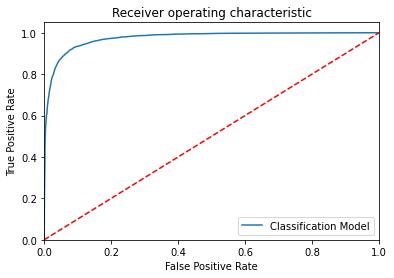

-----------------------------------------------------------------------------------------------------


In [32]:
    # Build the Calssification models and compare the results
    from sklearn.ensemble import BaggingClassifier
    models = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    

In [34]:
# performing tuning with Grid search

from sklearn.model_selection import train_test_split, GridSearchCV
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 10, 15, 25, 30]
max_samples = [5, 10, 25, 50, 100]
max_features = [1, 2, 5, 10, 13]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(models, hyperbag, cv = 3, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(x_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


In [38]:
# Printing best parameters

print(bestbag)
print('The best hyper parameters are:\n',gridbag.best_params_)

GridSearchCV(cv=3, estimator=BaggingClassifier(n_estimators=100), n_jobs=-1,
             param_grid={'max_features': [1, 2, 5, 10, 13],
                         'max_samples': [5, 10, 25, 50, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             verbose=1)
The best hyper parameters are:
 {'max_features': 5, 'max_samples': 100, 'n_estimators': 300}


Confusion matrix : 
 [[3465 2153]
 [ 780 7019]]
Outcome values : 
 3465 2153 780 7019
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.62      0.70      5618
           0       0.77      0.90      0.83      7799

    accuracy                           0.78     13417
   macro avg       0.79      0.76      0.76     13417
weighted avg       0.79      0.78      0.78     13417

Accuracy : 78.1 %
Precision : 81.6 %
Recall : 61.7 %
F1 Score : 0.703
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 75.8 %
MCC : 0.548
roc_auc_score: 0.758


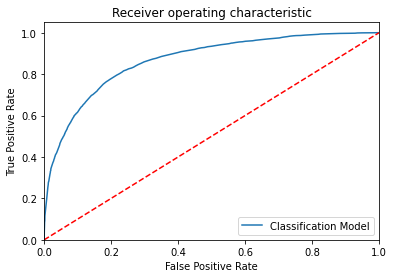

-----------------------------------------------------------------------------------------------------


In [37]:
    # Build the Calssification models and compare the results
    from sklearn.ensemble import BaggingClassifier
    models = BaggingClassifier(base_estimator=None, n_estimators=300, max_samples=100, max_features=5,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    

In [46]:
#  LINK - https://www.kaggle.com/datasets/yashsharan/the-elec2-dataset

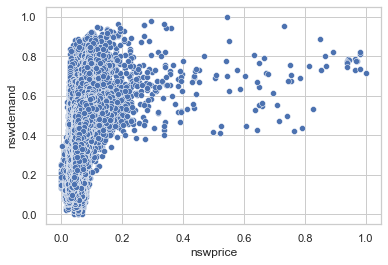

In [45]:
# reading the database
Edata = pd.read_csv("C:\\Users\\Dell\\Downloads\\electricity.csv")
 
sns.scatterplot(x='nswprice', y='nswdemand', data=Edata)
plt.show()

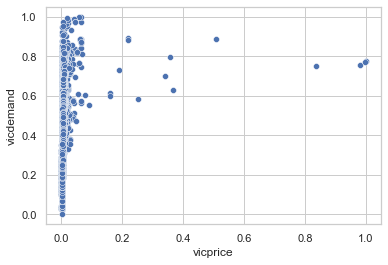

In [46]:
# reading the database
Edata = pd.read_csv("C:\\Users\\Dell\\Downloads\\electricity.csv")
 
sns.scatterplot(x='vicprice', y='vicdemand', data=Edata)
plt.show()

In [24]:
Edata.columns

Index(['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice',
       'vicdemand', 'transfer', 'Class'],
      dtype='object')

In [36]:
Edata = pd.read_csv(r"C:\\Users\\Dell\\Downloads\\electricity.csv", header=0)

Edata

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP
